# SCATTERPLOT PISILLI & WONDERKIDS

In [10]:
from matplotlib import font_manager
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

In [3]:
df = pd.read_csv("/Users/alfonsomarino/Desktop/wonderkids.csv", header = [1]) 
df.head(5)

,Rk,Player,SCA/90,PrgC/90,Att 3rd/90,PrgR/90,Season,Age,Nation,Team,Comp,MP,Min,90s,Starts,Subs,unSub,Pos,-9999
0,1,Arda Güler,6.5,2.2,34.8,9.3,2024-2025,19,tr TUR,Real Madrid,es La Liga,7,251,2.8,3,4,2,MFFW,3741ca58
1,2,Nicolás Paz,6.0,4.3,27.8,5.6,2024-2025,19,ar ARG,Como,it Serie A,6,418,4.6,4,2,0,MFFW,01bb93d5
2,3,Niccolò Pisilli,5.5,1.8,21.0,3.7,2024-2025,19,it ITA,Roma,it Serie A,5,244,2.7,3,2,2,MF,c84dcc88
3,4,Alberto Moleiro,5.4,4.0,20.9,7.7,2024-2025,20,es ESP,Las Palmas,es La Liga,9,681,7.6,8,1,0,FWMF,c2c8897d
4,5,Tyler Dibling,5.3,5.3,21.3,5.6,2024-2025,18,eng ENG,Southampton,eng Premier League,7,371,4.1,4,3,0,FWMF,bdcc89ae


In [9]:
font_path_regular = '/Users/alfonsomarino/Desktop/Teko/static/Teko-Regular.ttf'
# Create a font properties object with the font file
font_normal = font_manager.FontProperties(fname=font_path_regular)

font_path_med = "/Users/alfonsomarino/Desktop/Teko/static/Teko-Medium.ttf"
font_med = font_manager.FontProperties(fname = font_path_med)

font_path_semi = "/Users/alfonsomarino/Desktop/Teko/static/Teko-SemiBold.ttf"
font_semi = font_manager.FontProperties(fname = font_path_semi)

## Visualization

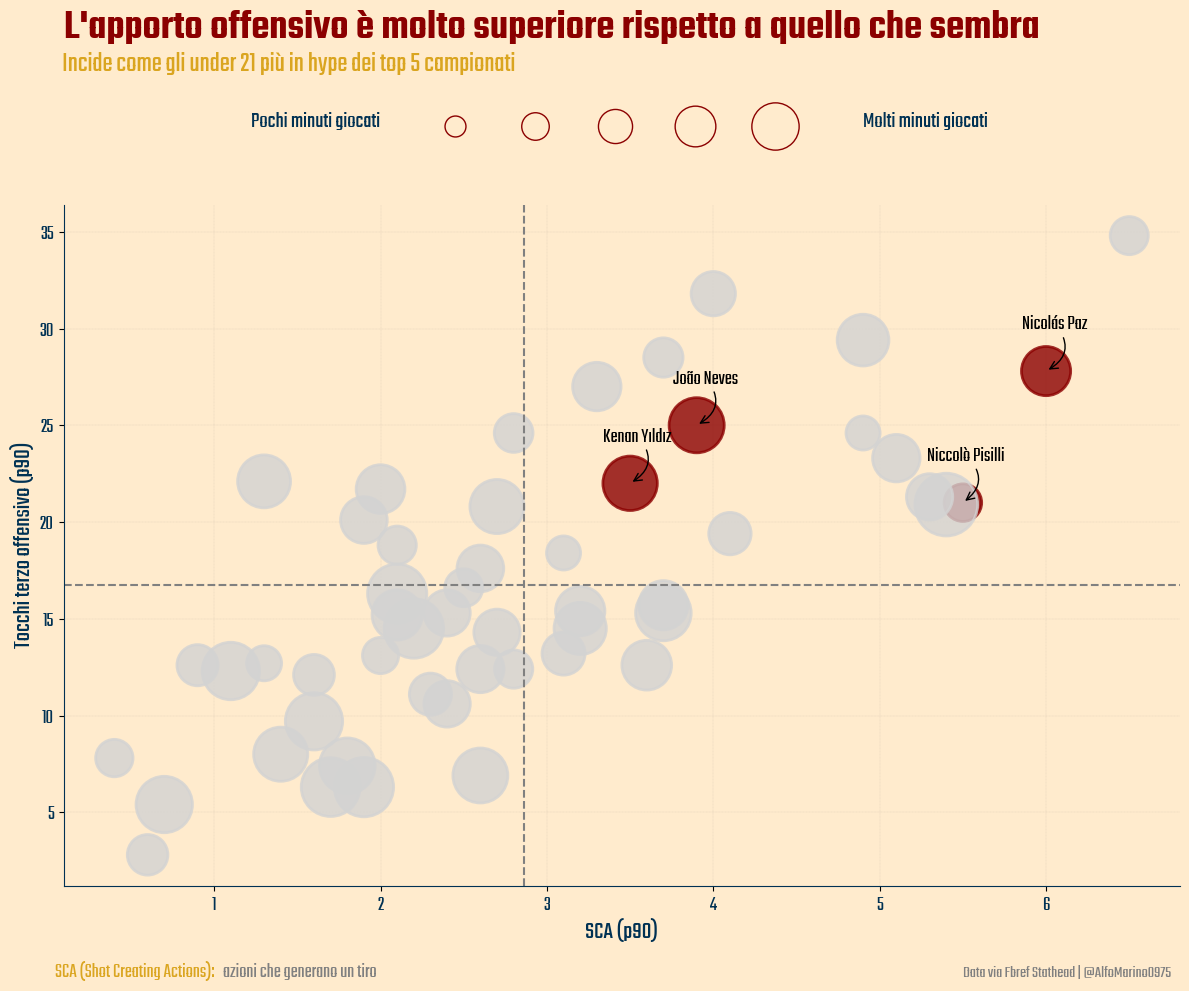

In [34]:
# List of players to highlight
highlighted_players = ["Nicolás Paz", "João Neves", "Kenan Yıldız", "Niccolò Pisilli"]

# Colors for highlighted and unhighlighted players
highlight_color = "darkred"
default_color = "lightgrey"
background_color = "blanchedalmond"

colors = [highlight_color if player in highlighted_players else default_color for player in df["Player"]]

plt.figure(facecolor=background_color, figsize=(12, 10))
ax = plt.gca()
ax.set_facecolor(background_color)

plt.scatter(df["SCA/90"], df["Att 3rd/90"], c=colors, s=df["Min"]*3, alpha=0.8, linewidth=2)

# Add arrows and text for highlighted players
for i, player in enumerate(df["Player"]):
    if player in highlighted_players:
        plt.annotate(player, 
                     (df["SCA/90"][i], df["Att 3rd/90"][i]), 
                     textcoords="offset points", 
                     xytext=(30, 30),  # Moves the text further away from the point
                     ha='right', 
                     color="black", fontproperties=font_normal,fontsize=14,
                     arrowprops=dict(arrowstyle="->", color="black", lw=1, 
                                     connectionstyle="arc3,rad=-.6"))  # Change the angle of the arrow

# add means
mean_sca = np.mean(df["SCA/90"])
mean_att = np.mean(df["Att 3rd/90"])
plt.axhline(mean_att, color='gray', linestyle='--', label='Media Tocchi p90')
plt.axvline(mean_sca, color='gray', linestyle='--', label='Media SCA p90')

plt.title("L'apporto offensivo è molto superiore rispetto a quello che sembra", fontproperties=font_semi, fontsize=30, pad=120, loc="left", color = "darkred")
plt.suptitle("Incide come gli under 21 più in hype dei top 5 campionati", fontproperties=font_normal, fontsize=20, color="goldenrod", y = 0.905, x=0.245)

plt.xlabel("SCA (p90)", fontproperties=font_normal, fontsize=18, color='#003153')
plt.ylabel("Tocchi terzo offensivo (p90)", fontproperties=font_normal, fontsize=18, color='#003153')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines["bottom"].set_color('#003153')
ax.spines["left"].set_color('#003153')

# Aggiungi light grid
plt.grid(True,  zorder=2, which='both', axis='both', color='gray', linestyle='--', linewidth=0.2, alpha=0.4)
ax.set_axisbelow(True)

plt.xticks(fontproperties=font_normal, fontsize=14,color='#003153')
plt.yticks(fontproperties=font_normal, fontsize=14, color='#003153')

# Credits
plt.figtext(0.98, -0.02, 'Data via Fbref Stathead | @AlfoMarino0975', fontproperties=font_normal, fontsize=12, ha='right', color = "grey")
plt.figtext(0.05, -0.02, 'SCA (Shot Creating Actions):', fontproperties=font_normal, fontsize=14, ha='left', color = "goldenrod")
plt.figtext(0.19, -0.02, 'azioni che generano un tiro', fontproperties=font_normal, fontsize=14, ha='left', color = "grey")

# Define the sizes for the dots in the legend based on the values of df[“Min”]
sizes = [min_value for min_value in np.linspace((df["Min"]*1.5).min(), df["Min"].max(), 5)]

# Legend
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                            markersize=size/20, markerfacecolor='none', markeredgecolor='darkred', linewidth=0) for size in sizes]

plt.legend(handles=legend_elements, loc='upper center', frameon=False, fontsize='large', ncol=len(sizes), bbox_to_anchor=(0.5, 1.15))
plt.text(2, 40.7, "Pochi minuti giocati", fontsize=16, color='#003153', ha='right', va='center', fontproperties= font_normal)
plt.text(4.9, 40.7, "Molti minuti giocati", fontsize=16, color='#003153', ha='left', va='center', fontproperties= font_normal)


plt.tight_layout()

plt.savefig("/Users/alfonsomarino/Desktop/scatterplot_pisilli.png", bbox_inches='tight', dpi=300)
plt.show()

None
